# ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON

El estudio previo de los datos o EDA es una etapa crítica en la ciencia de datos, y sin duda la que consume más tiempo.

Se va dividir el análisis en los siguientes apartados:

1. Comprender el problema
2. Estudio univariable
3. Estudio multivariable
4. Limpieza básica de los datos
5. Comprobación de suposiciones

In [1]:
# Importo las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [2]:
# Asigno los datos a un dataframe:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Echo un vistazo las columnas:
len(df_train.columns)

81

# 1. El problema

Para entender realmente el conjunto de datos, voy a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentaré responder a diversas cuestiones sobre ellas, como:

* La relevancia de la variable en la compra de una casa.
* La importancia de la variable.
* Solapamiento con otras variables.

Las variables se describen de la siguiente manera:

* <b>MSSubClass</b>: clase de construcción
* <b>MSZoning</b>: clasificación de la zona
* <b>LotFrontage</b>: pies lineales de calle de la parcela
* <b>LotArea</b>: tamaño de la parcela en pies cuadrados
* <b>Street</b>: tipo de acceso por carretera
* <b>Alley</b>: tipo de acceso al callejón
* <b>LotShape</b>: forma de la parcela
* <b>LandContour</b>: planitud de la parcela
* <b>Utilities</b>: servicios públicos disponibles
* <b>LotConfig</b>: Configuración de parcela
* <b>LandSlope</b>: pendiente de la parcela
* <b>Neighborhood</b>: ubicación física dentro de los límites de la ciudad de Ames
* <b>Condition1</b>: proximidad a la carretera principal o al ferrocarril
* <b>Condition2</b>: proximidad a la carretera principal o al ferrocarril (si hay un segundo)
* <b>BldgType</b>: tipo de vivienda
* <b>HouseStyle</b>: estilo de vivienda
* <b>OverallQual</b>: calidad general del material y del acabado
* <b>OverallCond</b>: condición general
* <b>YearBuilt</b>: fecha original de construcción
* <b>YearRemodAdd</b>: fecha de remodelación
* <b>RoofStyle</b>: tipo de cubierta
* <b>RoofMatl</b>: material del techo
* <b>Exterior1st</b>: revestimiento exterior de la casa
* <b>Exterior2nd</b>: revestimiento exterior de la casa (si hay más de un material)
* <b>MasVnrType</b>: tipo de revestimiento de mampostería
* <b>MasVnrArea</b>: área de revestimiento de mampostería en pies cuadrados
* <b>ExterQual</b>: calidad del material exterior
* <b>ExterCond</b>: estado del material en el exterior
* <b>Foundation</b>: tipo de cimentación
* <b>BsmtQual</b>: altura del sótano
* <b>BsmtCond</b>: estado general del sótano
* <b>BsmtExposure</b>: paredes del sótano a nivel de calle o de jardín
* <b>BsmtFinType1</b>: calidad del área acabada del sótano
* <b>BsmtFinSF1</b>: pies cuadrados de la superficie acabada tipo 1
* <b>BsmtFinType2</b>: calidad de la segunda superficie acabada (si existe)
* <b>BsmtFinSF2</b>: Pies cuadrados de la superficie acabada tipo 2
* <b>BsmtUnfSF</b>: pies cuadrados del área sin terminar del sótano
* <b>TotalBsmtSF</b>: pies cuadrados totales del sótano
* <b>Heating</b>: tipo de calefacción
* <b>HeatingQC</b>: calidad y estado de la calefacción
* <b>CentralAir</b>: aire acondicionado central
* <b>Electrical</b>: sistema eléctrico
* <b>1erFlrSF</b>: área en pies cuadrados de la primera planta (o planta baja)
* <b>2ndFlrSF</b>: área en pies cuadrados de la segunda planta
* <b>LowQualFinSF</b>: pies cuadrados acabados de baja calidad (todos los pisos)
* <b>GrLivArea</b>: superficie habitable por encima del nivel del suelo en pies cuadrados
* <b>BsmtFullBath</b>: cuartos de baño completos en el sótano
* <b>BsmtHalfBath</b>: medio baño del sótano
* <b>FullBath</b>: baños completos sobre el nivel del suelo
* <b>HalfBath</b>: medios baños sobre el nivel del suelo
* <b>Bedroom</b>: número de dormitorios por encima del nivel del sótano
* <b>Kitchen</b>: número de cocinas
* <b>KitchenQual</b>: calidad de la cocina
* <b>TotRmsAbvGrd</b>: total de habitaciones por encima del nivel del suelo (no incluye baños)
* <b>Functional</b>: valoración de la funcionalidad de la vivienda
* <b>Fireplaces</b>: número de chimeneas
* <b>FireplaceQu</b>: calidad de la chimenea
* <b>GarageType</b>: ubicación del garaje
* <b>GarageYrBlt</b>: año de construcción del garaje
* <b>GarageFinish</b>: acabado interior del garaje
* <b>GarageCars</b>: tamaño del garaje en capacidad de coches
* <b>GarageArea</b>: tamaño del garaje en pies cuadrados
* <b>GarageQual</b>: calidad de garaje
* <b>GarageCond</b>: condición de garaje
* <b>PavedDrive</b>: calzada asfaltada
* <b>WoodDeckSF</b>: area de plataforma de madera en pies cuadrados
* <b>OpenPorchSF</b>: área de porche abierto en pies cuadrados
* <b>EnclosedPorch</b>: área de porche cerrada en pies cuadrados
* <b>3SsnPorch</b>: área de porche de tres estaciones en pies cuadrados
* <b>ScreenPorch</b>: superficie acristalada del porche en pies cuadrados
* <b>PoolArea</b>: área de la piscina en pies cuadrados
* <b>PoolQC</b>: calidad de la piscina
* <b>Fence</b>: calidad de la valla
* <b>MiscFeature</b>: característica miscelánea no cubierta en otras categorías
* <b>MiscVal</b>: valor en dólares de la característica miscelánea
* <b>MoSold</b>: mes de venta
* <b>YrSold</b>: año de venta
* <b>SaleType</b>: tipo de venta
* <b>SaleCondition</b>: Condiciones de venta

# 2. Análisis univariable: 'SalePrice'

La variable 'SalePrice' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento:

In [5]:
# Resumen de estadística descriptiva:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

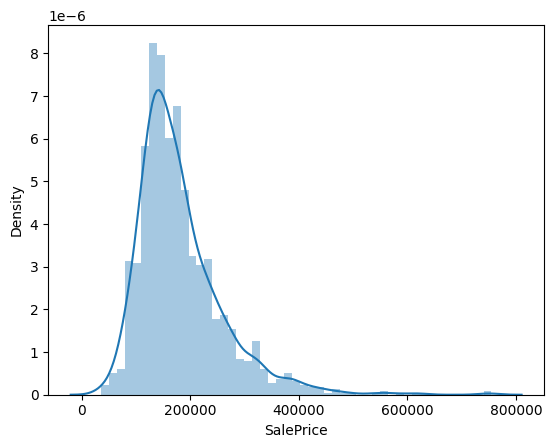

In [6]:
# Histograma:
sns.distplot(df_train['SalePrice'])

A simple vista se pueden apreciar:

* Una desviación con respecto a la distribución normal.
* Una asimetría positiva.
* Algunos picos.

In [7]:
# Asimetría y curtosis:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relación con variables numéricas

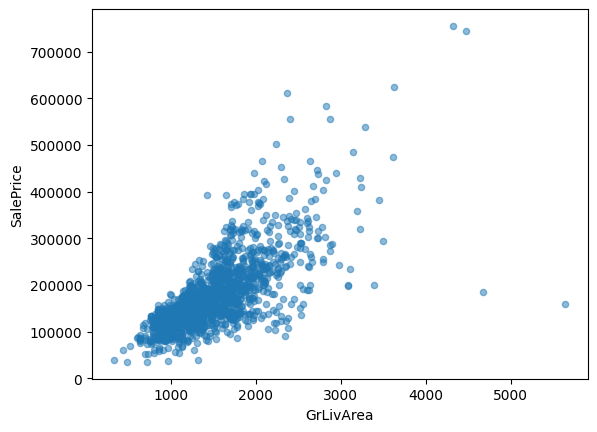

In [8]:
# Diagrama de dispersión grlivarea/saleprice:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

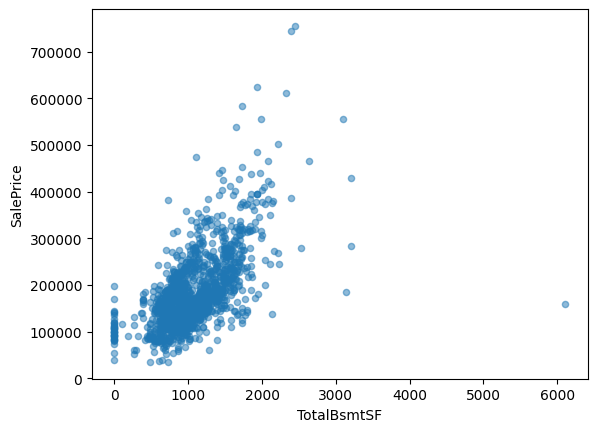

In [9]:
# Diagrama de dispersión totalbsmtsf/saleprice:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

### Relación con variables categóricas

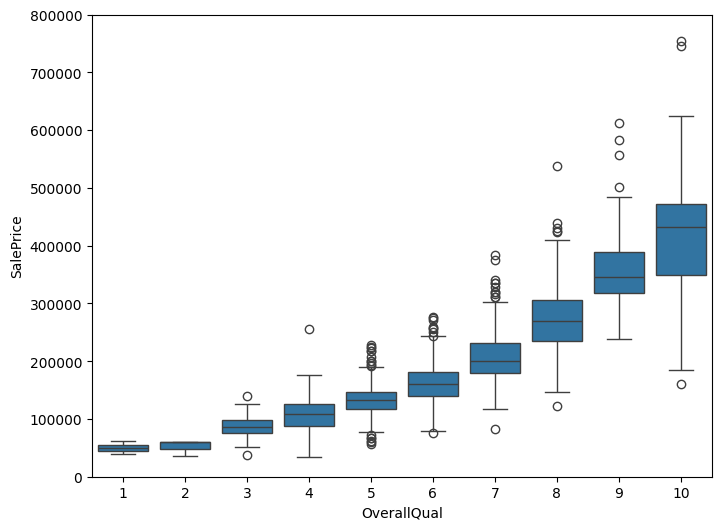

In [10]:
# Diagrama de cajas overallqual/saleprice:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [11]:
df_train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

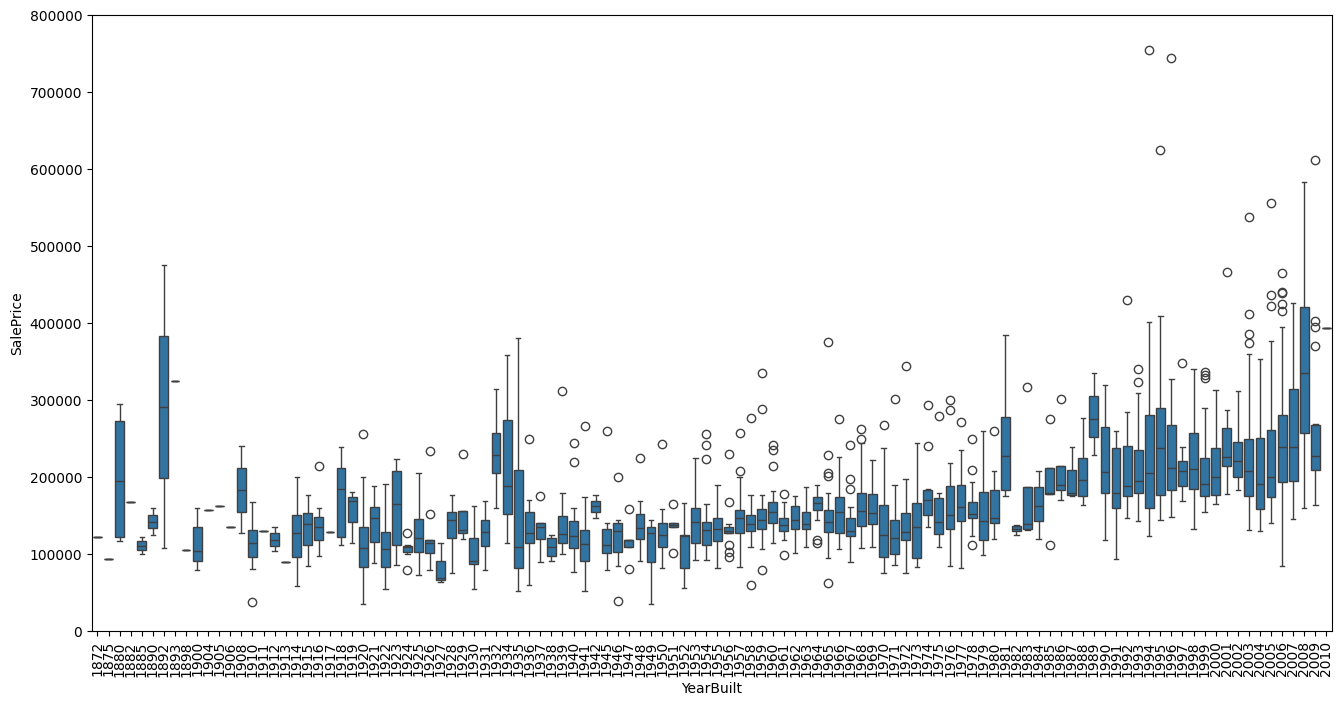

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Resumiendo:

* 'GrLivArea' y 'TotalBsmtSF' mantienen una relación lineal positiva con 'SalePrice', aumentando en el mismo sentido. En el caso de 'TotalBsmtSF', la pendiente de esta relación es muy acentuada.
* 'OverallQual' y 'YearBuilt' también parecen relacionadas con 'SalePrice' (más fuerte en el primer caso), tal y como se puede observar en los diagramas de cajas.

Sólo he explorado cuatro variables, pero hay muchas otras a analizar.

# 3. Análisis multivariable

Hasta ahora sólo me he dejado llevar por la intuición para el análisis de las variables que he creído importantes. Es hora de un análisis más objetivo.

Para ello voy a realizar las siguientes pruebas de correlación:
* Matriz de correlación general.
* Matriz de correlación centrada en la variable 'SalePrice'.
* Diagramas de dispersión entre las variables más correladas.

#### Matriz de correlación (en forma de mapa de calor)

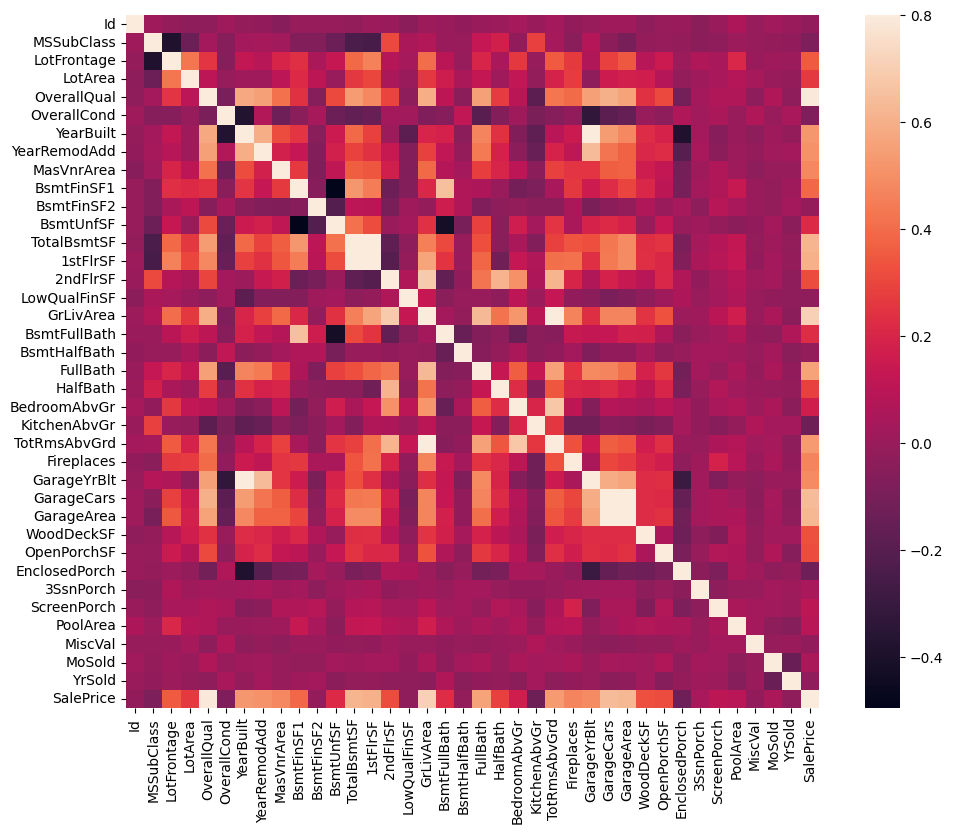

In [15]:
# Matriz de correlación:
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [16]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'TotalBsmtSF' y '1stFlrSF', seguidas por las variables 'Garage*X*'. En ambos casos parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'SalePrice', destacan las vistas anteriormente ('GrLivArea', 'TotalBsmtSF' y 'OverallQual'), pero hay otras que también deberían ser tenidas en cuenta.

#### Matriz de correlación de 'SalePrice'

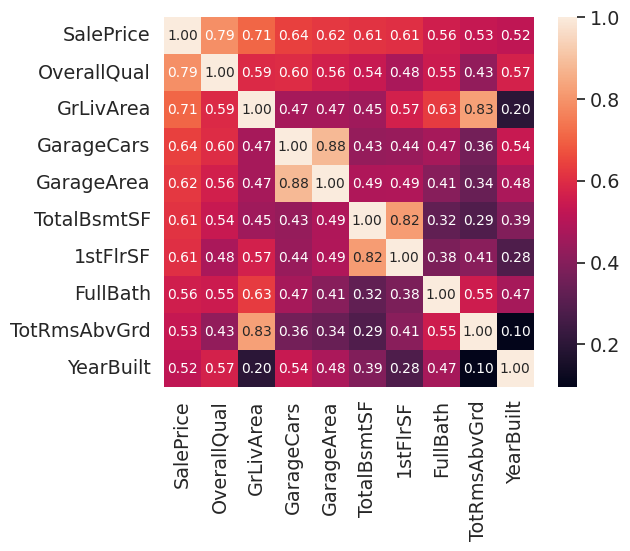

In [17]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [18]:
corr = df_train.corr(numeric_only=True)
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False).style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


En estas matrices de correlación se puede observar:

* 'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correladas con 'SalePrice'.
* 'GarageCars' y 'GarageArea' también están fuertemente correlacionadas; pero el número de coches que se pueden aparcar en un garaje es una consecuencia de su superficie. Es por esto que sólo se va mantener una de estas variables en el análisis, 'GarageCars', ya que está más correlada con 'SalePrice'.
* 'TotalBsmtSF' y '1stFloor' plantean la misma situación. En este se mantendrá 'TotalBsmtSF'.
* 'FullBath' también está correlacionada con 'SalePrice'.
* 'TotRmsAbvGrd' y 'GrLivArea', otro caso de multicolinealidad.
* 'YearBuilt' también está ligeramente correlacionada con 'SalePrice'. 

#### Diagramas de dispersión entre 'SalePrice' y sus variables correlacionadas

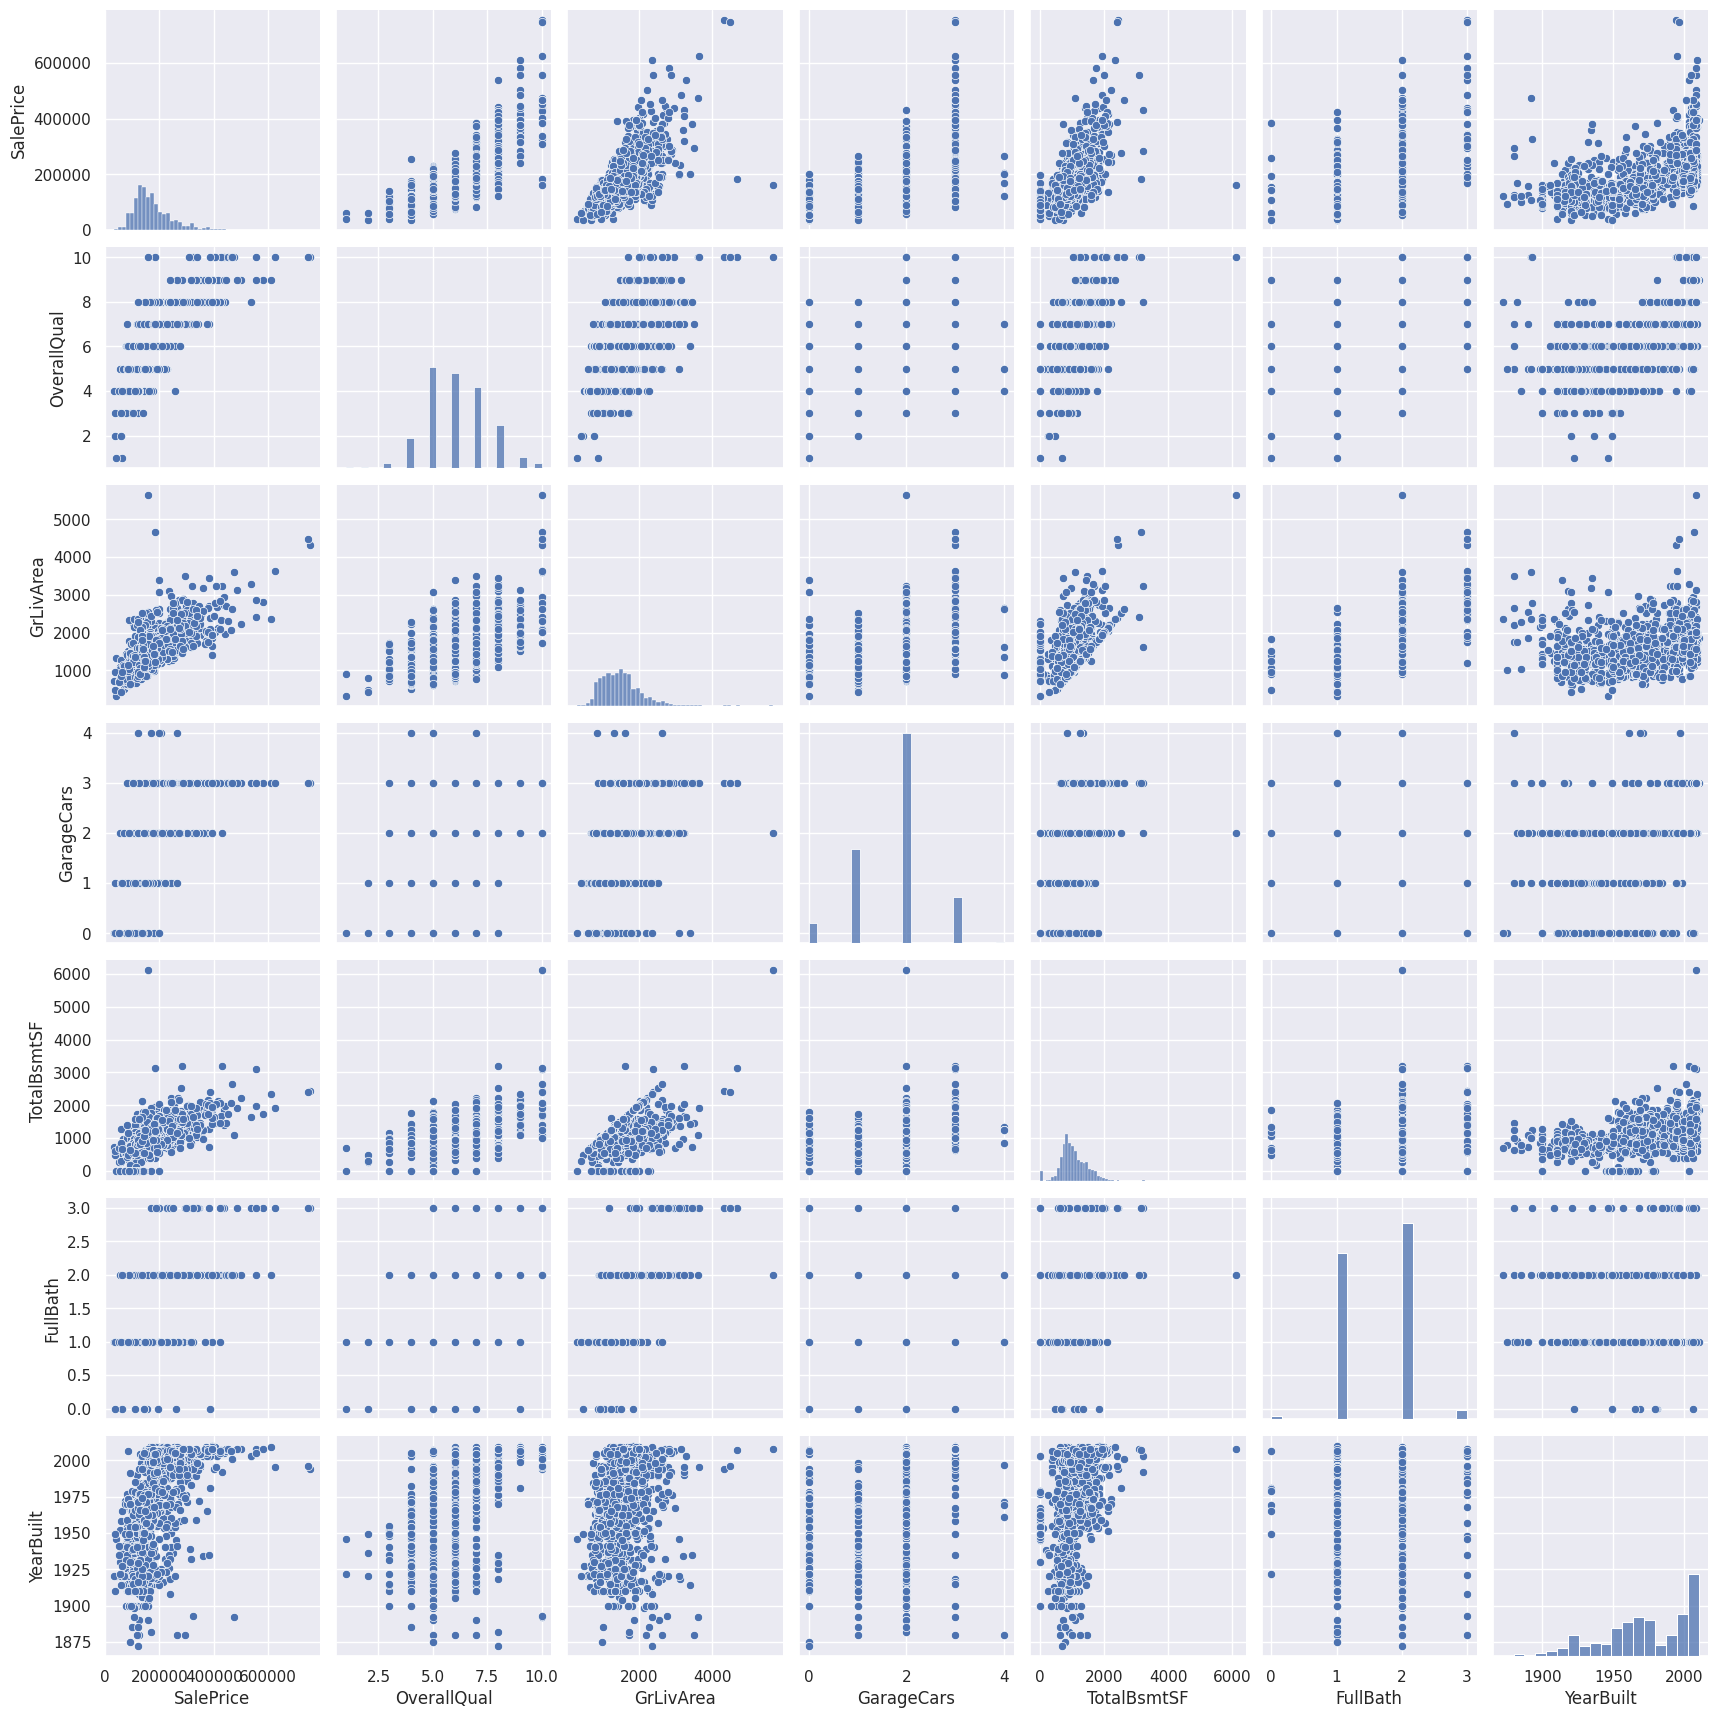

In [19]:
# Scatter plot:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Aunque ya habíamos visto algunas de las figuras, este diagrama nos facilita una comprensión general sobre las relaciones entre las variables.

# 4. Limpieza de datos

### Datos desaparecidos

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

In [20]:
# Missing data:

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


#### Análisis bivariable

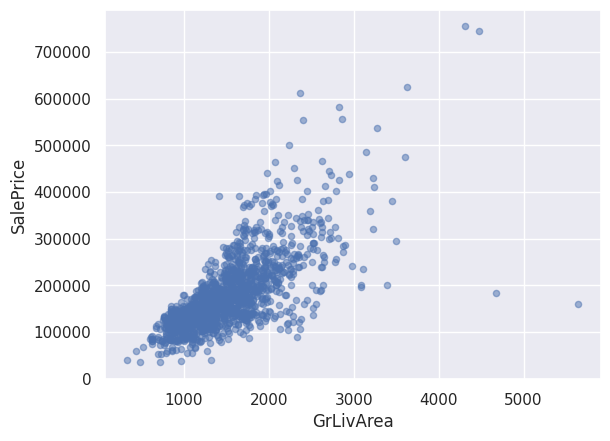

In [21]:
# Análisis bivariable SalePrice/GrLivArea:

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Este diagrama de dispersión muestra un par de cosas interesantes:

* Los dos valores más altos de la variable 'GrLivArea' resultan extraños. Sólo puedo especular, pero podría tratarse de terrenos agrícolas o muy degradados, algo que explicaría su bajo precio. Lo que está claro es que estos dos puntos son atípicos, por lo que se puede proceder a eliminarlos.
* Las dos observaciones más altas de la variable 'SalePrice' se corresponden con las que observamos en el análisis univariable anterior. Son casos especiales, pero parece que siguen la tendencia general, por lo que serán mantenidas.

In [22]:
# Eliminación de valores:

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

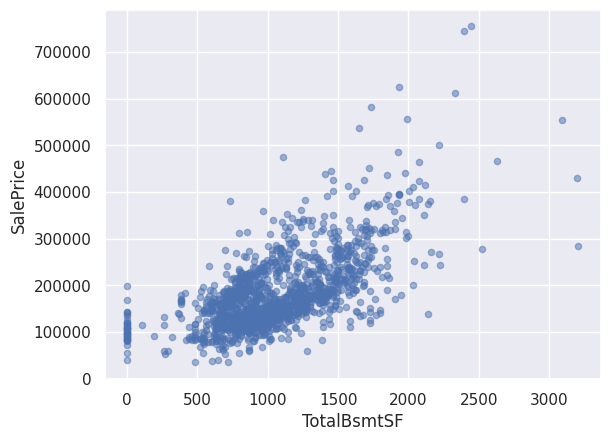

In [23]:
# Análisis bivariable SalePrice/TotalBsmtSF:

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Aunque se pueden observar algunos valores bastante extremos (p.ej. TotalBsmtSF > 3000), parece que conservan la tendencia, por lo que voy a mantenerlos.

# 5. Comprobación de normalidad

Ya se ha realizado cierta limpieza de datos y el estudio de la variable 'SalePrice'. Ahora comprobaremos si 'SalePrice' cumple las asunciones estadísticas que nos permiten aplicar las técnicas del análisis multivariable.

De acuerdo con Joseph F. Hair, hay que comprobar cuatro suposiciones fundamentales:

* <b>Normalidad</b> - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'SalePrice', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

* <b>Homocedasticidad</b> - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras, según Joseph F. Hair. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

* <b>Linealidad</b>- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, según la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.

* <b>Ausencia de errores correlacionados</b> - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Para nuestro caso ello no aplica.

### En búsqueda de la normalidad

El objetivo es estudiar la variable 'SalePrice' de forma fácil, comprobando:

* <b>Histograma</b> - Curtosis y asimetría.
* <b>Gráfica de probabilidad normal</b> - La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

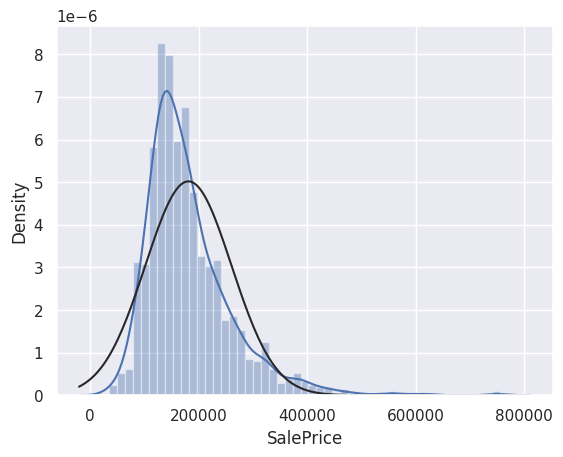

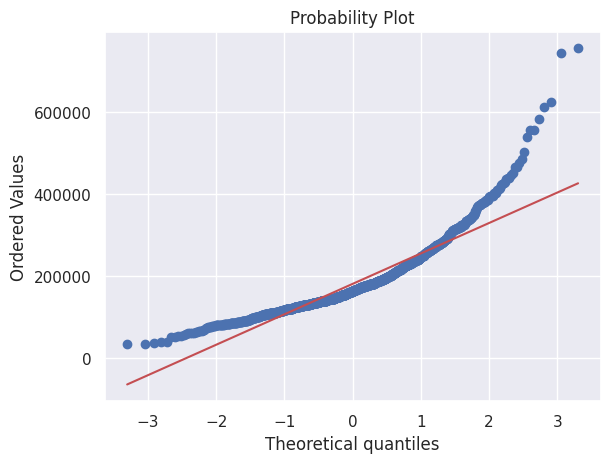

In [24]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

De estos gráficos se desprende que 'SalePrice' no conforma una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema. 

In [25]:
# Transformación de los datos:

df_train['SalePrice'] = np.log(df_train['SalePrice'])

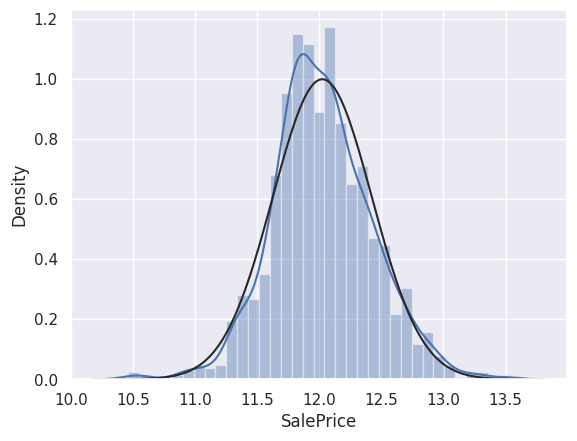

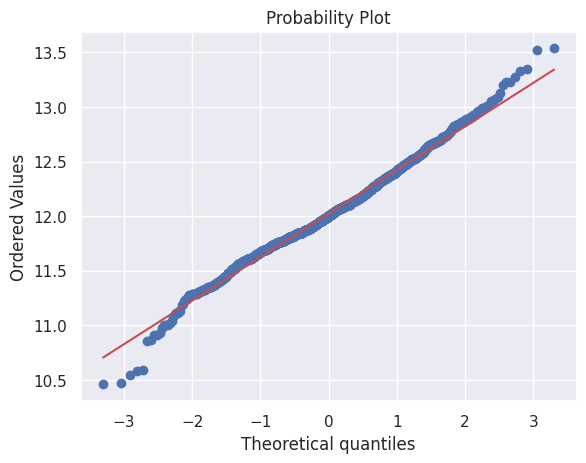

In [26]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

Terminado el trabajo con 'SalePrice', voy a seguir con 'GrLivArea'.

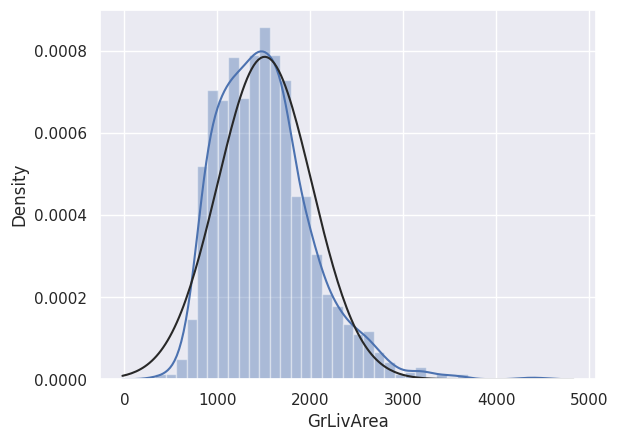

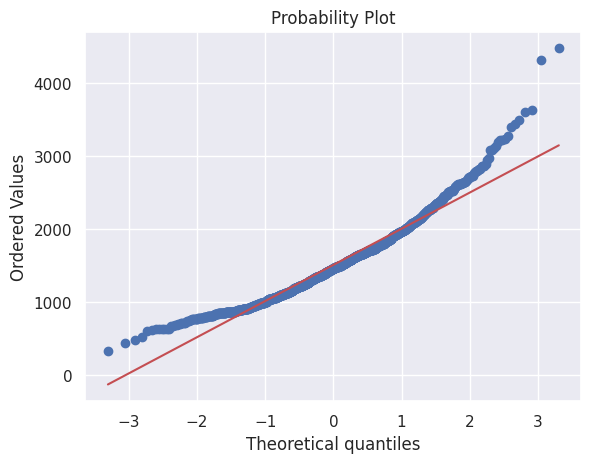

In [27]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

La variable 'GrLivArea' muestra asimetría.

In [28]:
# Transformación de datos:

df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

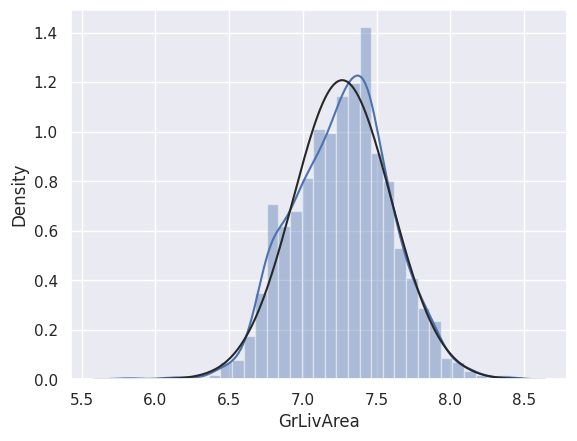

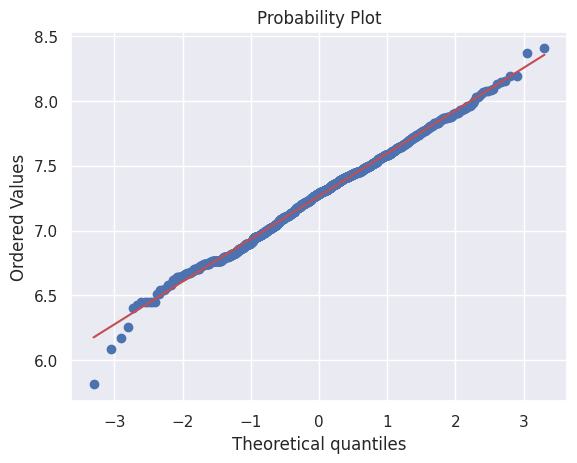

In [29]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Prosigo con el estudio de la variable 'TotalBsmtSF'.

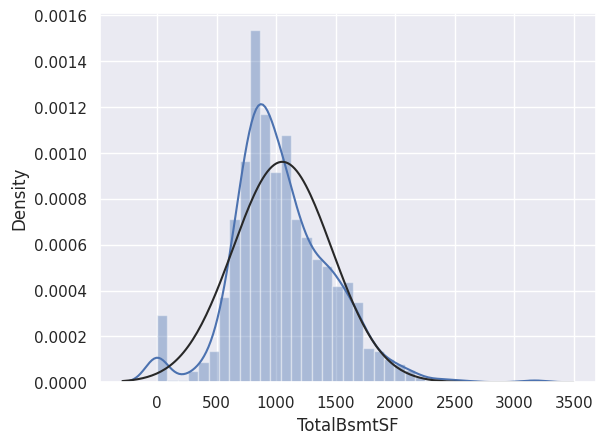

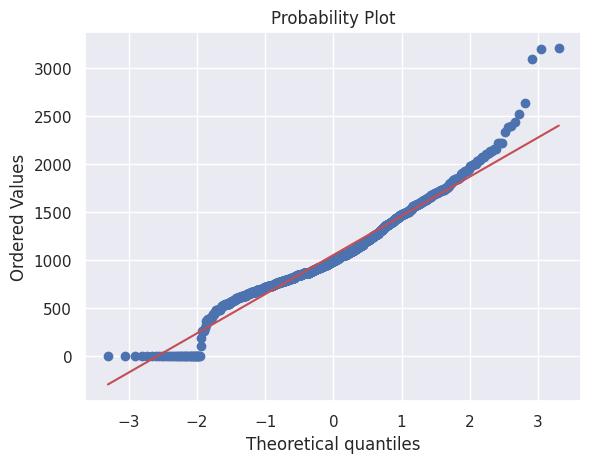

In [30]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Estos gráficos nos muestran que la variable 'TotalBsmtSF':

* Presenta asimetrías.
* Hay un número significativo de observaciones con valor cero (casas sin sótano).
* El valor cero no nos permite hacer transformaciones logarítmicas.

Para aplicar una transformación logarítmica, crearé una variable binaria (tener o no tener sótano). Después, aplicaré la transformación logarítmica a todas las observaciones que no sean cero, ignorando aquellas con valor cero. De esta manera podré transformar los datos, sin perder el efecto de tener o no sótano.

In [31]:
# Creación de la columna para una nueva variable categórica binaria (1 si area>0, 0 si area==0):

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [32]:
# Transformación de datos:

df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

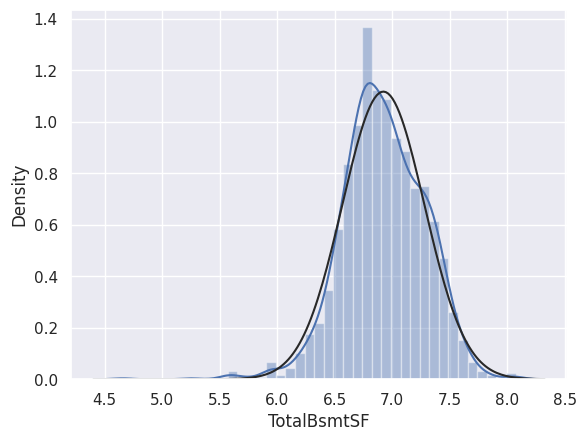

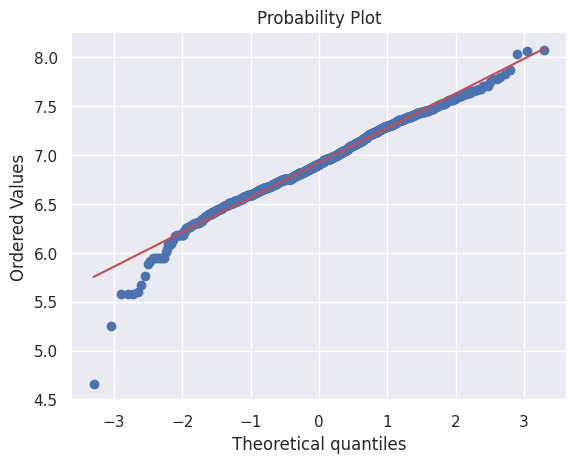

In [33]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

### En búsqueda de la homocedasticidad

El mejor método para probar la homocedasticidad para dos variables métricas es de forma gráfica. Las desviaciones de una dispersión uniforme se muestran mediante formas tales como conos (pequeña dispersión a un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (un gran número de puntos en el centro de la distribución).

Empiezo por 'SalePrice' y 'GrLivArea'.

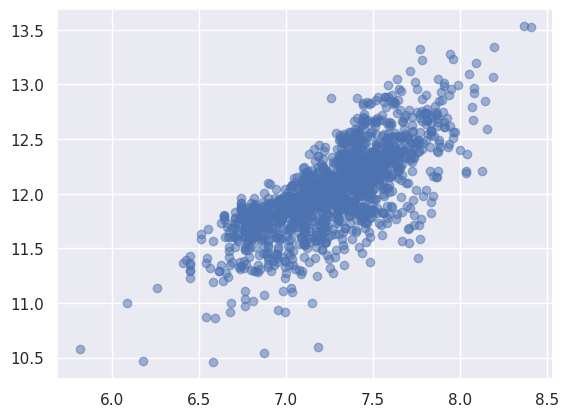

In [34]:
# Gráfico de dispersión:

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], alpha = 0.5);

Las anteriores versiones de este gráfico de dispersión (antes de las transformaciones logarítmicas), tenían una forma cónica. Como puede apreciarse, el gráfico actual ya no tiene una forma cónica. Tan solo asegurando la normalidad en algunas variables, hemos resuelto el problema de la homocedasticidad.

Ahora vamos a comprobar 'SalePrice' con 'TotalBsmtSF'.

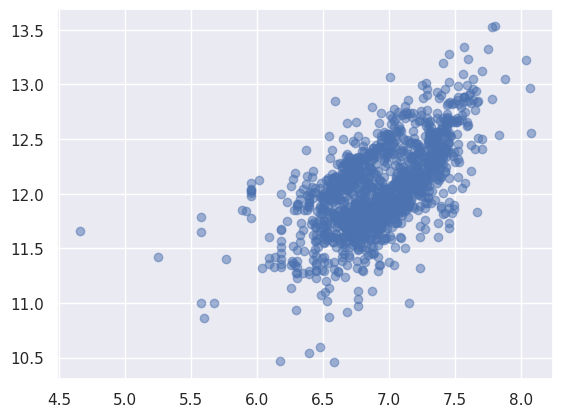

In [35]:
# Gráfico de dispersión:

plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'], alpha = 0.5);

Podemos decir que, en general, la variable 'SalePrice' muestra niveles equivalentes de varianza en todo el rango de 'TotalBsmtSF'.

### Variables dummy

In [36]:
# Convertir las variables categóricas en variables ficticias o dummies:

df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_train